In [1]:
import pandas as pd
import numpy as np

import seaborn as sns; sns.set()
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 9) # (w, h)

Переменные, характеризующие кредитную историю клиента \
closed_cred_sum - сумма, которую клиент выплатил по ранее взятым и закрытым
кредитам\
closed_creds - количество закрытых кредитов\
active_cred_sum_overdue - суммарная задолженность по активным кредитам\
active_cred_sum - сумма всех активных кредитов\
active_cred_day_overdue - суммарная просрочка в днях по всем активным кредитам\
active_cred_max_overdue - максимальная сумма просроченной задолженности по
активным кредитам\\\

Переменные характеризующие клиента\
age - возраст\
gender - пол\
region - регион\
month_income - ежемесячный доход\
\
Переменные, характеризующие кредит, по которому нужно сделать
прогноз\
first_loan - сумма, которую клиент хочет получить в кредит (из заявки)\
first_days_quant - срок, на которую клиент хочет взять кредит\
loan_cost_all - одобренная клиенту сумма кредита\
order_date - дата подачи заявки на получение кредита\
cost_all - сумма всех выплат по одобренному кредиту\
order_id - id заявки\
client_id - id клиента\

\
Целевая переменная:\
expert - решение, которое принято по заявке (0 - одобрено, 1 - отклонено)
Необходимо на основе предоставленных данных построить модель для предсказания\
целевой переменной. Сделать описание проделанных шагов\
● Анализ данных\
● Фильтрация\
● Преобразование переменных\
● Моделирование\
● Оценка качества модели\
Обоснование выбранной метрики качества. Подробно описать способ оценки качества\
построенной модели.\
На выполнение задание отводится 1 неделя с момента получения письма\

In [2]:
df = pd.read_csv('data.csv',sep=';')
df

,closed_cred_sum,closed_creds,active_cred_sum_overdue,active_cred_sum,active_cred_day_overdue,active_cred_max_overdue,age,gender,region,first_loan,loan_cost_all,first_days_quant,month_income,order_date,cost_all,order_id,client_id,expert
0,143822.00,22,104.12,130068.80,8,756.09,31,0,36,10000.0,10000,196,0.0,2017-07-23,0.0,728319,320464,1
1,0.00,0,38151.93,46230.00,1492,38151.93,51,0,93,10000.0,10000,17,20000.0,2017-07-23,0.0,728321,320466,1
2,51356.00,2,3000.00,3000.00,8,3000.00,28,1,3,10000.0,10000,84,0.0,2017-07-23,0.0,728323,320467,1
3,0.00,0,22784.19,32103.52,913,22784.19,28,0,52,10000.0,10000,7,0.0,2017-07-23,0.0,728447,320533,1
4,12298.00,1,4942.95,4950.00,2883,4942.95,31,0,47,5000.0,5000,20,0.0,2017-07-23,0.0,728421,298598,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,0.00,0,74662.61,79662.61,2593,42204.55,27,1,0,4000.0,4000,20,0.0,2017-08-13,0.0,759472,96091,1
49997,21653.49,2,0.00,0.00,0,0.00,28,0,75,2000.0,2000,10,20000.0,2017-08-13,0.0,759475,338240,1
49998,0.00,0,0.00,1000.00,0,941.00,22,0,0,10000.0,10000,20,35000.0,2017-08-13,0.0,759485,338246,1
49999,0.00,0,0.00,1000.00,0,941.00,22,0,0,10000.0,10000,20,35000.0,2017-08-13,0.0,759485,338246,1


# Анализ данных

In [ ]:
import pandas_profiling
# pandas_profiling.ProfileReport(df)
profile=pandas_profiling.ProfileReport(df)
profile.to_widgets()

Проверка на пропуски показала, что они содержатся только в одном столбце - 19 шт
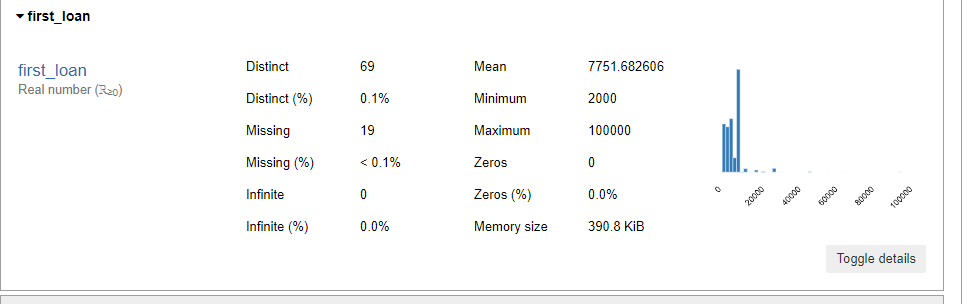

In [3]:
# Пропусков мало. Просто удалим.
df=df.dropna().reset_index().drop(columns='index')

Видно, что чаще НЕ одобряют
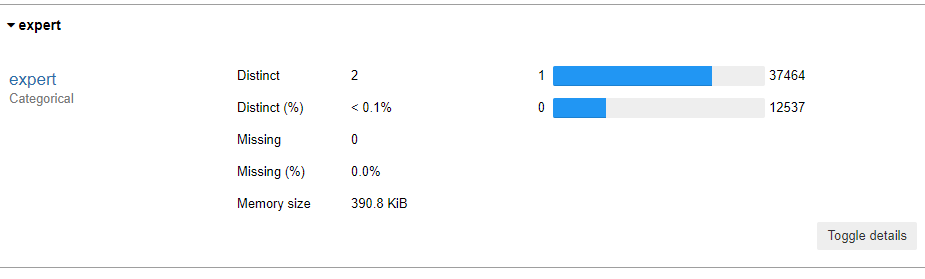

Очевидные закономерности
1. Чем больше просил тем больше одобрили сумму\
first_loan - сумма, которую клиент хочет получить в кредит (из заявки)\
loan_cost_all - одобренная клиенту сумма кредита\

2. Чем больше долг, тем больше просрочка\
active_cred_sum_overdue - суммарная задолженность по активным кредитам\
active_cred_max_overdue - максимальная сумма просроченной задолженности по
активным кредитам\


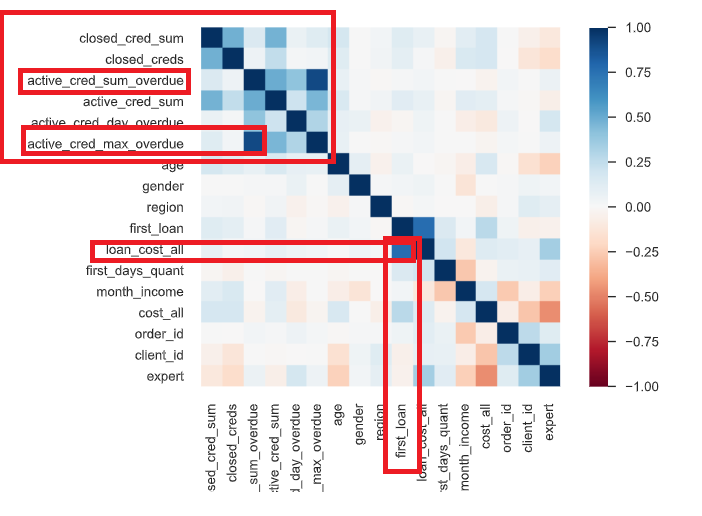

In [4]:
# Отклон-е заявки
df_expert1=df[df.expert==1].drop(columns=['order_id','client_id','expert'])
# Одобренные заявки
df_expert0=df[df.expert==0].drop(columns=['order_id','client_id','expert'])

У НЕ одобренных клиентов сильнее проявляется взаимосвязь active_cred_sum_overdue и active_cred_max_overdue. Можно сделать вывод о том, что эти клиенты не надежны. Они на текущий момент не платежеспособны и с большей вероятностью допустят новую просрочку 

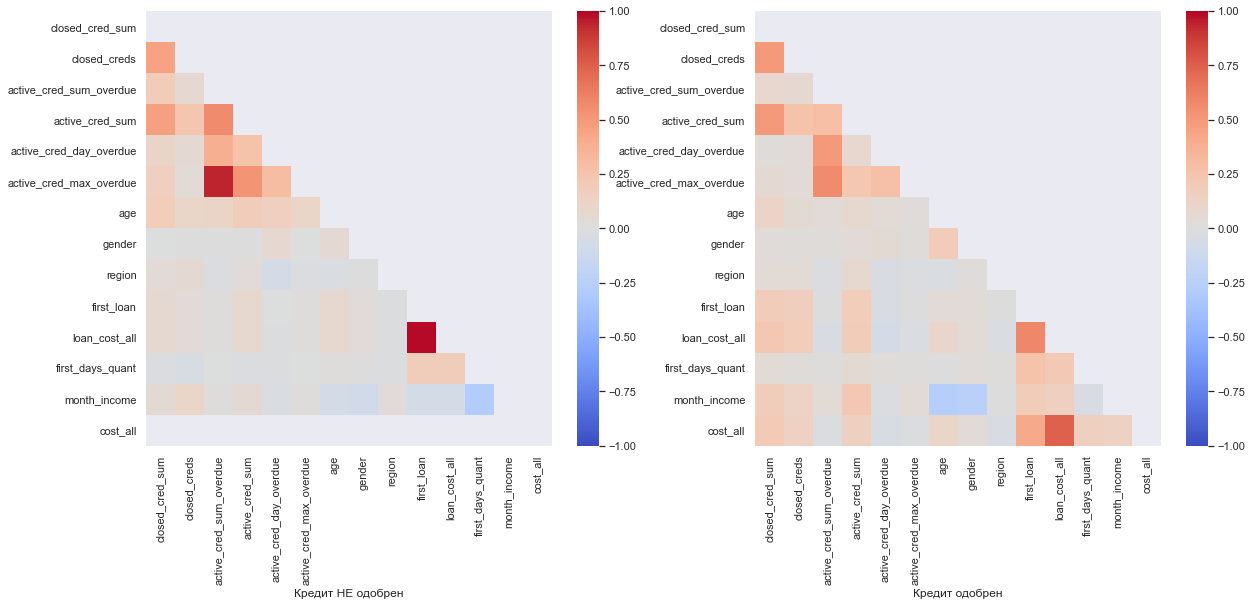

In [5]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 8))

matrix = np.triu(df_expert1.corr())
sns.heatmap(df_expert1.corr(), mask=matrix,cmap= 'coolwarm',ax=axes[0],vmin=-1, vmax=1)
axes[0].set_xlabel('Кредит НЕ одобрен')

matrix = np.triu(df_expert0.corr())
sns.heatmap(df_expert0.corr(), mask=matrix,cmap= 'coolwarm',ax=axes[1],vmin=-1, vmax=1)
axes[1].set
plt.show()

Для не одобр. кредитов отсутствует 
cost_all - сумма всех выплат по одобренному кредиту
Проверим значение этого столбца, оно ноль везде т.к. кредит не был одобрен
Потом при классификации удалим

In [6]:
print('Кол-во уникальных эл-в',df_expert1.cost_all.nunique())
print('Уникальные эл-ы',df_expert1.cost_all.unique())

Кол-во уникальных эл-в 1
Уникальные эл-ы [0.]


Рассмотрим данные подробнее

In [153]:
df_describe=df.describe()
df_describe

,closed_cred_sum,closed_creds,active_cred_sum_overdue,active_cred_sum,active_cred_day_overdue,active_cred_max_overdue,age,gender,region,first_loan,loan_cost_all,first_days_quant,month_income,cost_all,order_id,client_id,expert
count,4.998200e+04,49982.000000,4.998200e+04,4.998200e+04,49982.000000,4.998200e+04,49982.000000,49982.000000,49982.000000,49982.000000,49982.000000,49982.000000,49982.000000,49982.000000,49982.000000,49982.000000,49982.000000
mean,1.865166e+05,7.970669,5.217429e+04,1.964154e+05,722.429735,3.777104e+04,35.020587,0.462667,28.821856,7751.682606,6705.389940,23.956484,24939.579759,1234.195947,734746.383218,290578.089572,0.749290
std,5.056417e+05,13.919431,2.537653e+05,4.365647e+05,1371.564836,1.704280e+05,11.234474,0.498609,29.724171,5310.782009,4610.418096,36.676875,20653.701067,4557.468892,26256.403292,74591.278505,0.433426
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,18.000000,0.000000,0.000000,2000.000000,100.000000,7.000000,0.000000,0.000000,695828.000000,109.000000,0.000000
25%,5.503128e+03,1.000000,0.000000e+00,1.467076e+04,0.000000,4.870000e+02,27.000000,0.000000,0.000000,5000.000000,3000.000000,10.000000,0.000000,0.000000,715042.250000,294899.500000,0.000000
50%,4.287800e+04,4.000000,5.000000e+03,5.701932e+04,64.000000,6.761390e+03,32.000000,0.000000,25.000000,7000.000000,7000.000000,20.000000,25000.000000,0.000000,734701.500000,316159.500000,1.000000
75%,1.740713e+05,9.000000,3.156241e+04,1.972031e+05,923.000000,2.449937e+04,41.000000,1.000000,52.000000,10000.000000,10000.000000,20.000000,35000.000000,0.000000,749476.000000,330172.750000,1.000000
max,4.457421e+07,563.000000,3.303100e+07,2.273166e+07,21927.000000,2.170166e+07,99.000000,1.000000,99.000000,100000.000000,100000.000000,336.000000,550000.000000,238770.420000,840692.000000,393528.000000,1.000000


Удивительно - клиент закрыл 563 кредита. \
Правда или опечатка? Нет возможности проверить. Оставляем

<Figure size 864x648 with 0 Axes>

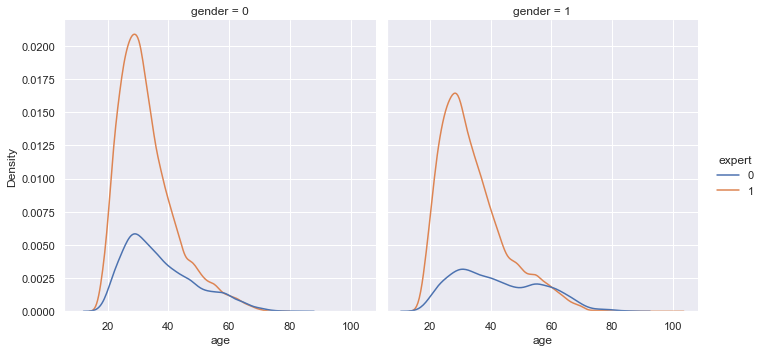

In [52]:
# Сморим распределения по полу и возрасту
# Expert 0 - одобрен кредит
# Expert 1 - НЕ одобрен кредит
fig = plt.figure()
sns.displot(data=df, x="age", hue="expert", col="gender",kind="kde",label=['Одобрен','Не одобрен'])

Молодые чаще запрашивают кредит вне зависимости от пола

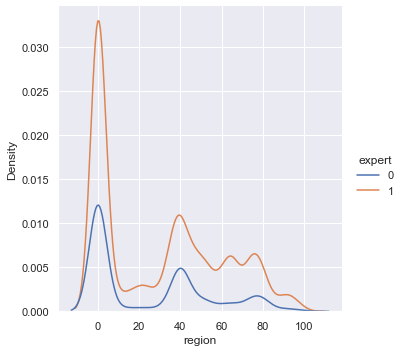

In [66]:
# Expert 0 - одобрен кредит
# Expert 1 - НЕ одобрен кредит
sns.displot(data=df, x="region", hue="expert", kind="kde",label=['Одобрен','Не одобрен'])

Предполоенеи чем больше, зп тем больше сумму просят в кредит
Итог - нет. Запрашивают разные суммы

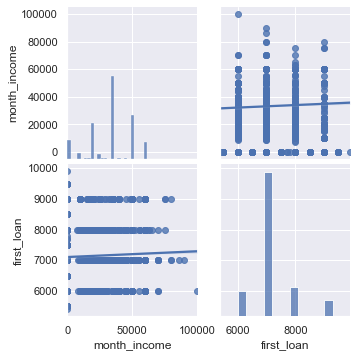

In [12]:
# Выбираем основную часть , которую клиент хочет получить в кредит (из заявки)
# Выбираем основную часть ,  ежемесячный доход
df_month_income_first_loan_25_75=df[(df['month_income']>df_describe.loc['25%','month_income'])&(df['month_income']<df_describe.loc['75%','month_income'])]
df_month_income_first_loan_25_75=df[(df['first_loan']>df_describe.loc['25%','first_loan'])&(df['first_loan']<df_describe.loc['75%','first_loan'])]
sns.pairplot(df_month_income_first_loan_25_75[['month_income','first_loan']], kind="reg")
plt.show()

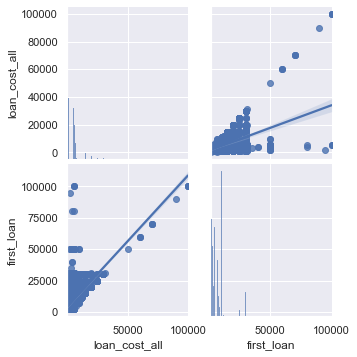

In [240]:
# Запросили сумму, а какую одоюрили?
sns.pairplot(df_expert0[['loan_cost_all','first_loan']], kind="reg")
plt.show()

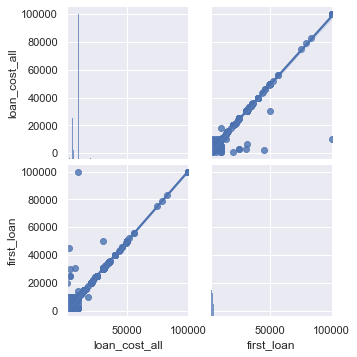

In [241]:
# Что происходит в колонке одобренной суммы где решение expert 1 - отклонено?
# Странно... просто дублирование ?
sns.pairplot(df_expert1[['loan_cost_all','first_loan']], kind="reg")
plt.show()

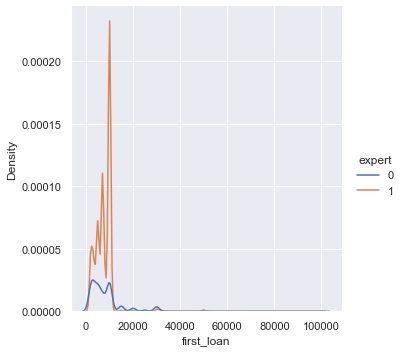

In [142]:
# Больше всего запрашивают небольшие суммы
# Expert 0 - одобрен кредит
# Expert 1 - НЕ одобрен кредит
sns.displot(data=df, x="first_loan", hue="expert", kind="kde",label=['Одобрен','Не одобрен'])

Итог, что узнали:\
    Отказов больше чем согласований\
    Подавляющее большинство берет небольшие суммы от 5000 до 10000\
    0 и 20 регион популярнее - там больше запросов на кредит\
    Большинство людей запрашивают в возрасте от 30 до 40 лет\
    зп не влияет на сумму кредикта, запрашиваемую клиентом\
    Чаще всего одобряют сумму которую запрашивают от 3 000 до 10 000, в заивсимости от запроса клиента и его истории предлагается сумма чуть больше или меньше чем запрашиваемая
    

# Фильтрация

Удаляем переменные, которые не нужны при обучении\
order_date,order_id,client_id не описывают клиента\
expert содержbт информацию об итоговом решении\
cost_all оформляется уже после одобрения и начала выплат\
loan_cost_all сомнительная перемення при анализе не ясно как заполнялась для клиентов, которым кредит не был одобрен\

In [258]:
data_to_predict=df.drop(columns=['expert','order_date',
                                 'order_id','client_id',
                                 'cost_all','loan_cost_all'])

При сборе данных могли произойти ошибки заполнения. Возможно данные собирались вручную и пользователи допускали ошибки при заполнении. 

<AxesSubplot:>

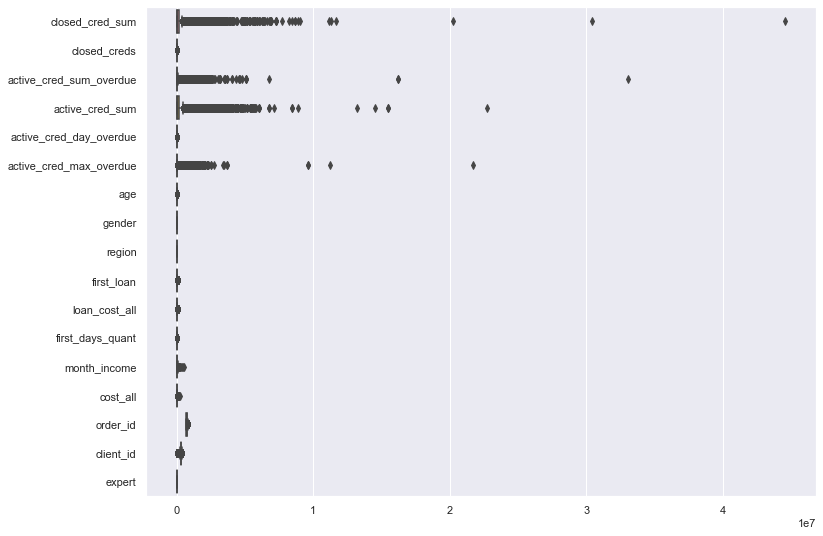

In [293]:
sns.boxplot(data=df,orient='h')

In [260]:
#Находим выбросы.
describe=data_to_predict.describe()
befor_del_blowouts=data_to_predict
after_find_blowouts=pd.DataFrame()

for i in list(data_to_predict):
    Q1=describe.loc['25%',i]
    Q3=describe.loc['75%',i]
    IQR=Q3-Q1
    left_lim=Q1-1.5*IQR
    right_lim=Q3+1.5*IQR
    temp_score_data=befor_del_blowouts[[i]].where((befor_del_blowouts[[i]]<right_lim) &
                                                         (befor_del_blowouts[[i]]>left_lim))
    
    after_find_blowouts[[i]]=temp_score_data

In [261]:
#Проверим соотношение выбросов к данным. 
compare=pd.DataFrame({'Всего':befor_del_blowouts.count(),
              'Выбросы':after_find_blowouts.isnull().sum(),
             'Не_выбросы':after_find_blowouts.count()})

compare.transpose()

,closed_cred_sum,closed_creds,active_cred_sum_overdue,active_cred_sum,active_cred_day_overdue,active_cred_max_overdue,age,gender,region,first_loan,first_days_quant,month_income
Всего,49982,49982,49982,49982,49982,49982,49982,49982,49982,49982,49982,49982
Выбросы,5790,4707,6671,5455,4817,6557,1564,0,0,1388,3109,102
Не_выбросы,44192,45275,43311,44527,45165,43425,48418,49982,49982,48594,46873,49880


In [294]:
# Просто удалим выбросы
after_del_blowouts=after_find_blowouts.dropna(how='any',axis=0)

In [273]:
# Потеряли 40 % инф
alls=len(befor_del_blowouts)
part=len(after_del_blowouts)
lost_percent=100-part*100/alls

lost_percent

40.37253411228042

In [297]:
df_after_del_blowouts = df[df.index.isin(after_del_blowouts.index)]
df_after_del_blowouts 

,closed_cred_sum,closed_creds,active_cred_sum_overdue,active_cred_sum,active_cred_day_overdue,active_cred_max_overdue,age,gender,region,first_loan,loan_cost_all,first_days_quant,month_income,order_date,cost_all,order_id,client_id,expert
1,0.00,0,38151.93,46230.00,1492,38151.93,51,0,93,10000.0,10000,17,20000.0,2017-07-23,0.0,728321,320466,1
3,0.00,0,22784.19,32103.52,913,22784.19,28,0,52,10000.0,10000,7,0.0,2017-07-23,0.0,728447,320533,1
10,0.00,0,21143.00,21143.00,1016,10924.00,28,1,0,10000.0,10000,15,30000.0,2017-07-23,0.0,728553,123851,1
12,0.00,0,0.00,8000.00,0,0.00,24,1,80,7000.0,7000,10,35000.0,2017-07-23,0.0,728476,320544,1
13,0.00,0,0.00,8000.00,0,0.00,24,1,80,7000.0,7000,10,35000.0,2017-07-23,0.0,728478,320544,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49976,0.00,0,26758.57,25000.00,371,26758.57,44,1,42,3000.0,1000,23,50000.0,2017-08-13,1545.0,759462,338231,0
49978,21653.49,2,0.00,0.00,0,0.00,28,0,75,2000.0,2000,10,20000.0,2017-08-13,0.0,759475,338240,1
49979,0.00,0,0.00,1000.00,0,941.00,22,0,0,10000.0,10000,20,35000.0,2017-08-13,0.0,759485,338246,1
49980,0.00,0,0.00,1000.00,0,941.00,22,0,0,10000.0,10000,20,35000.0,2017-08-13,0.0,759485,338246,1



Удалилии старые выбросы. График строится исходя из новых данных, видим, что данных детектированных как выбросы уже меньше


<AxesSubplot:>

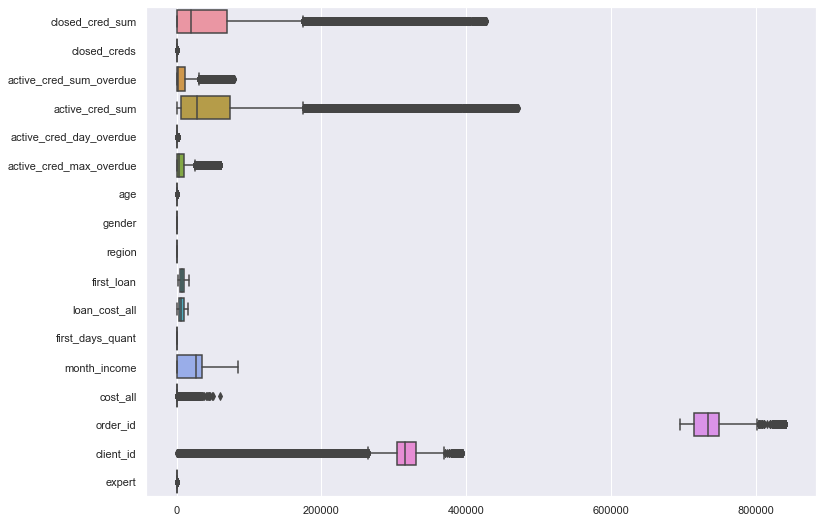

In [310]:
sns.boxplot(data=df_after_del_blowouts,orient='h')

# Преобразование переменных

Переменные уже были преведены в числовой формат - gender, expert,region... \
Однако,  переменные имеют вариативность, сохранять которую нет необходимости. Достаточно резделить на группы

In [299]:
data_to_predict=df_after_del_blowouts
# Повторение процедуры удаления ненужных фич
data_to_predict=df.drop(columns=['expert','order_date',
                                 'order_id','client_id',
                                 'cost_all','loan_cost_all'])

In [300]:
data_to_predict.nunique()

closed_cred_sum            25308
closed_creds                 166
active_cred_sum_overdue    20182
active_cred_sum            25130
active_cred_day_overdue     4717
active_cred_max_overdue    21713
age                           68
gender                         2
region                        99
first_loan                    69
first_days_quant              38
month_income                 247
dtype: int64

In [301]:
columns_name=data_to_predict.columns.values

for i in np.delete(columns_name, np.where(columns_name == 'gender')):
    buf_qcuted = pd.qcut(df[i].values, 4,duplicates='drop')
    data_to_predict[i] = pd.Series(buf_qcuted.codes)

In [302]:
data_to_predict.nunique()

closed_cred_sum            4
closed_creds               4
active_cred_sum_overdue    3
active_cred_sum            4
active_cred_day_overdue    3
active_cred_max_overdue    4
age                        4
gender                     2
region                     3
first_loan                 4
first_days_quant           3
month_income               3
dtype: int64

После преобразования распределения выглядят структурированно

<AxesSubplot:>

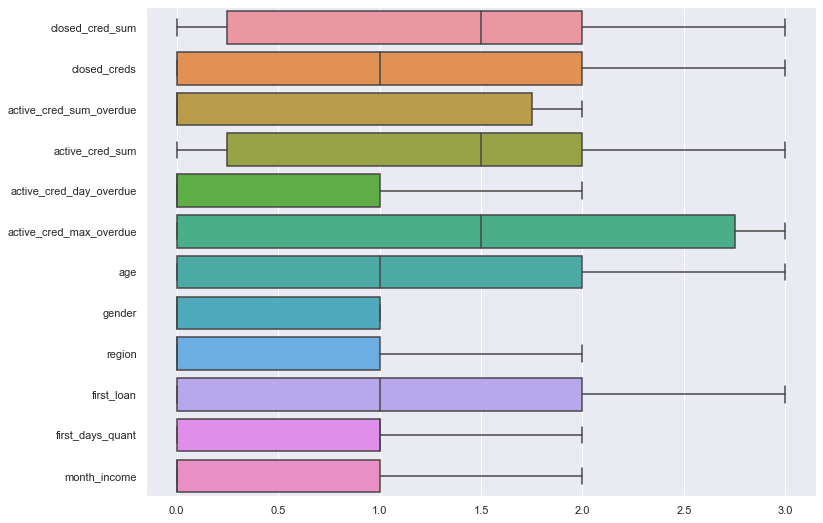

In [311]:
sns.boxplot(data=data_to_predict,orient='h')

Для хорошей работы алгоритмов может потребоваться нормализация или стандартизация данных. Данные операции были бы необходимы в случаее линейных данных - сигналы с датчиков. В данном случае ранее блыа выполнена сегментация, которая сгладила данные. Однако, выполним обе операции для демонстрации подхода.

In [304]:
# Данные которые нужно обработать
data=np.array(data_to_predict)

In [305]:
# Нормализация
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(data)
norm_data=transformer.transform(data)

df_norm=pd.DataFrame(norm_data)
df_norm.columns=data_to_predict.columns
df_norm['gender']=df['gender']

In [306]:
# Стандартизация
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
std_data=scaler.transform(data)

df_std=pd.DataFrame(std_data)
df_std.columns=data_to_predict.columns
df_std['gender']=df['gender']

In [307]:
df_stat=pd.DataFrame()
df_stat['max_df']=df.max()
df_stat['min_df']=df.min()

df_stat['max_norm']=df_norm.max()
df_stat['min_norm']=df_norm.min()

df_stat['max_std']=df_std.max()
df_stat['min_std']=df_std.min()
df_stat

,max_df,min_df,max_norm,min_norm,max_std,min_std
closed_cred_sum,44574209.38,0.0,1.000000,0.0,1.341659,-1.341623
closed_creds,563,0,1.000000,0.0,1.404604,-1.171755
active_cred_sum_overdue,33030999.24,0.0,0.577350,0.0,1.511685,-0.894973
active_cred_sum,22731655.24,0.0,1.000000,0.0,1.341659,-1.341623
active_cred_day_overdue,21927,0,0.816497,0.0,1.508160,-0.903449
active_cred_max_overdue,21701655.24,0.0,1.000000,0.0,1.341612,-1.341541
age,99,18,1.000000,0.0,1.377400,-1.273586
gender,1,0,1.000000,0.0,1.000000,0.000000
region,99,0,1.000000,0.0,1.570442,-0.896987
first_loan,100000.0,2000.0,1.000000,0.0,1.924401,-1.232117


<AxesSubplot:>

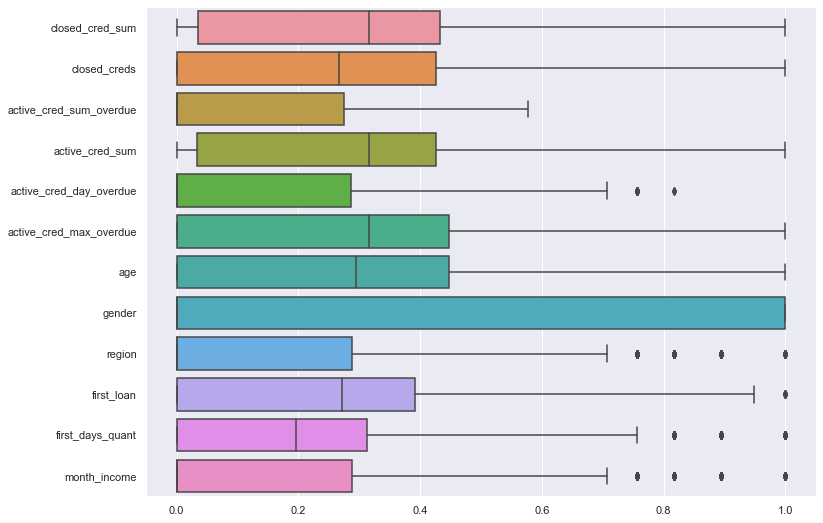

In [334]:
sns.boxplot(data=df_norm,orient='h')

<AxesSubplot:>

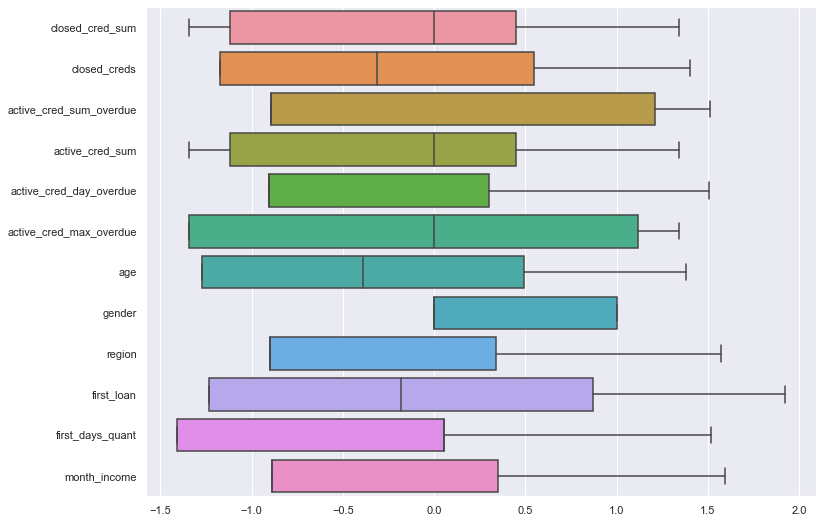

In [335]:
sns.boxplot(data=df_std,orient='h')

Определим наиболее важные параметры

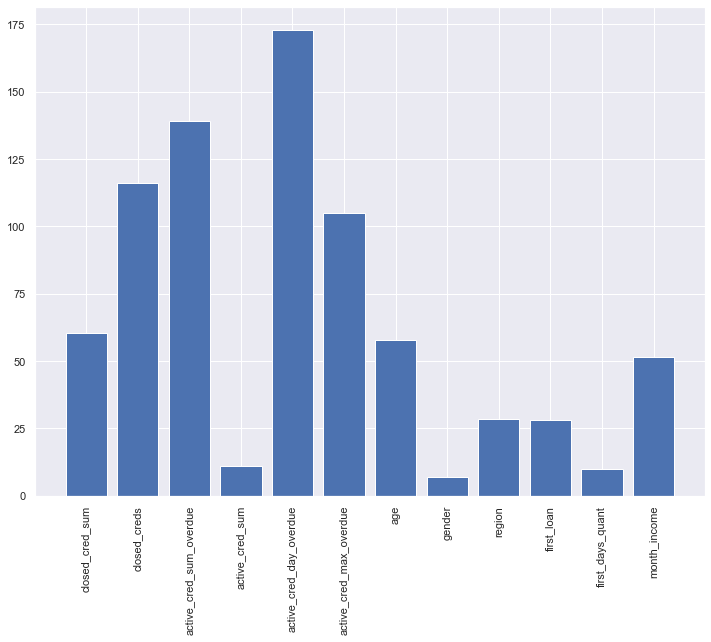

In [308]:
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=12)
selector.fit_transform(norm_data, np.array(df.expert))
scores = -np.log10(selector.pvalues_)

df_norm_columns=np.array(df_norm.columns)
plt.bar(range(len(df_norm_columns)), scores)
plt.xticks(range(len(df_norm_columns)), df_norm_columns, rotation='vertical')
plt.show()

Значимость влияния на решенеие:\
1.active_cred_day_overdue - суммарная просрочка в днях по всем активным кредитам
2.active_cred_sum_overdue - суммарная задолженность по активным кредитам\
3.active_cred_max_overdue - максимальная сумма просроченной задолженности по активным кредитам \
4.closed_cred_sum - сумма, которую клиент выплатил по ранее взятым и закрытым кредитам\
\
Итак, важнее всего текущая финансовая ситуация клиента. Так же влияние оказывает прошлая история кредитования

# Моделирование

Как правило, стоит опробовать разлиные модели на практике. Заранее сложно сделать заключение, какой алгоритм будет лучше работать для конкретного набора данных

In [516]:
# Массив в который запишем все классификаторы
all_classificators=[]

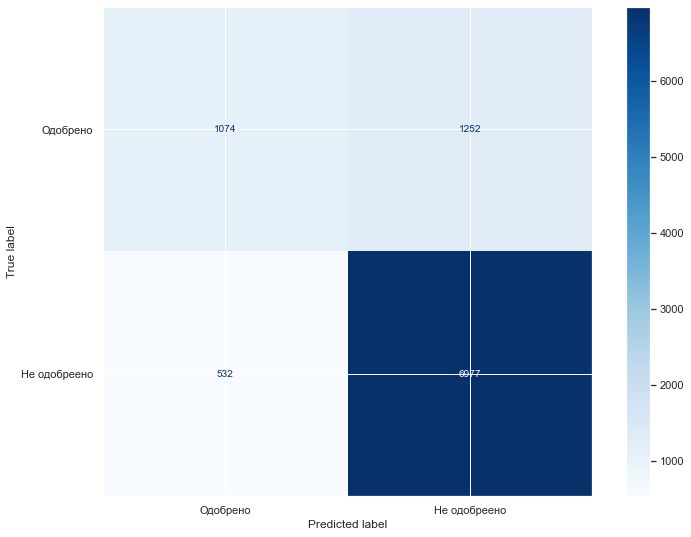

In [332]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn_GridSearchCV, X_test, y_test,
                     cmap=plt.cm.Blues,display_labels=['Одобрено','Не одобреено'])  
                          
plt.show()  

In [513]:
# Создание выборок
from sklearn.model_selection import train_test_split
X=df_std[df_std.index.isin(after_del_blowouts.index)].values
y=df_after_del_blowouts.expert.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# KNeighborsClassifier

In [514]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
# Cоздаем модель и ищем лучшие параметры
knn = KNeighborsClassifier()
param = {'n_neighbors': np.arange(1, 25,2),
          'weights':['uniform','distance']}
knn_GridSearchCV = GridSearchCV(knn, param, cv=5)
knn_GridSearchCV.fit(X_train, y_train)
# Создаем модель с лучшими параметрами
knn = KNeighborsClassifier(**knn_GridSearchCV.best_params_)

In [518]:
all_classificators.append(knn)

# SGDClassifier

In [519]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(random_state=1)
all_classificators.append(sgd)

# SVC

In [522]:
from sklearn.svm import SVC
svc = SVC(C=1.0)
all_classificators.append(svc)

# GaussianNB

In [523]:
from sklearn.naive_bayes import GaussianNB
nbs = GaussianNB()
all_classificators.append(nbs)

# DecisionTreeClassifier

In [524]:
from sklearn.model_selection import GridSearchCV
tree = DecisionTreeClassifier()
#Ищем лучшие параметры
parameters = { 'max_depth':range(5, 30,3),
               'min_samples_leaf':range(5, 50,5),
               'min_samples_split':range(5, 50,5)}
tree_GridSearchCV=GridSearchCV(tree,parameters,cv=3)
tree_GridSearchCV.fit(X_train,y_train)
# Создаем модель с лучшими параметрами
tree = DecisionTreeClassifier(**tree_GridSearchCV.best_params_)

In [525]:
all_classificators.append(tree)

# RandomForestClassifier

In [526]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=1, n_estimators=500, min_samples_split=8, min_samples_leaf=2)
all_classificators.append(forest)

# Сравнение моделей

Accuracy\
Краткое пояснение. Наиболее простая метрика - Accuracy. Оценивать точность по доле правильных ответов, кажется интуитивно просто. Однако у метрики есть "подводный камень" - не работает с несбалансированными классами. А рассматриваемом примере классы не сбалансированы. Отказов примерно в три раза больше чем одобрений\


Precision recall\
При классификации могут возникать ошибки первого или второго рода: ложно положительные и ложно отрицательные. Для их оценки используются метрики Precision recall, которые отражают точность и полноту:

Precision-точность- доля верно определенных решений из класса 1 (Сколько из тех что сказали 1 действительно были 1)\
recall - полнота - доля объектов  класса 1 из всех объектов  класса 1, которые были распознаны\

F\
Оба выше обозначеных параметра важны, задача выбора классификатора сводится к поиску компромиса этих метрик. Обощающей метрикой является F-мера, которая будет максимальна, когда recall и precision равны единице. Также метрика будет близка к нулевому значению, если хоть одина из составляющих близока к нулю.

Ассиметричные метрики\
Для сравнения могу использоваться метрики, которые например штрафуют ложно отрицательные результаты выше. Такой подход может быть акутуален например в медицине, постановка ложного диагноза "здоров" может стоить жизни. В рассматриваемом примере использование таких метрик не оправдано

Для вычисления метрик будем применять функцию cross_val_score. Данная функция позводят использовать валидацию при вычислении метрик. Таким образом мы можем быть уверенны, что хорошее значение метрики это не просто случайность или совпадение, а закономерность. Параметр cv выставлен равным 5, а следовательно для рассчета каждой метрики проводится пять итераций. Предоставленный набор разбивается на пять частей и в каждую итерацию модель обучается на 4 блоках и тестируется на оставшемся. 

In [539]:
# Отметим несемметричность данных
df[df.index.isin(after_del_blowouts.index)][['expert','client_id']].groupby('expert').count()

,client_id
expert,
0,7004
1,22799


In [527]:
df_metrics=pd.DataFrame(columns=['alg','Accuracy','precision','recall','f1'])

In [1]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import cross_val_score

i=0
for classifier in all_classificators:  
    alg_name = str(type(all_classificators[i]))[:-2]
    alg_name=alg_name.rsplit(".")[-1]
    df_metrics.loc[i,'alg']=alg_name

    df_metrics.loc[i,'Accuracy']=(np.mean(cross_val_score(classifier, X, y, cv=5)))
    df_metrics.loc[i,'precision']=(np.mean(cross_val_score(classifier, X, y, cv=5, scoring='precision')))
    df_metrics.loc[i,'recall']=(np.mean(cross_val_score(classifier, X, y, cv=5, scoring='recall')))
    df_metrics.loc[i,'f1']=(np.mean(cross_val_score(classifier, X, y, cv=5, scoring='f1')))

    i=i+1
df_metrics

NameError: name 'all_classificators' is not defined

In [547]:
# Лучший алгоритм по каждой метрике
print('Accuracy',df_metrics[['alg','Accuracy']].max().values)
print('precision',df_metrics[['alg','precision']].max().values)
print('recall',df_metrics[['alg','recall']].max().values)
print('f1',df_metrics[['alg','f1']].max().values)

Accuracy ['SVC' 0.8292118062709626]
precision ['SVC' 0.8696286628502878]
recall ['SVC' 0.9635510345836076]
f1 ['SVC' 0.8954110049356393]


Как отмечалось ранее, в нашей задаче классы не сбалансированны. Поэтому предлагается оценить классификаторы оторвано от бинарных результатов. На самом деле результат работы классифкатора это вещественное значение, показывающее вероятность принадлежности к классу 0 или 1. Бинарные результаты же получаются в результате выбора некоторого порога при преевышении которого экземпляру назначается тот или иной класс. При отсутствии баланса в классах выбор серединоого порога 0,5 не является правильным. \
\
ПРедлагается рассмотреть график ROC AUC, на котором изображена кривая, оси которой ограничены 0 и 1. Оси x и y представленны в шкалах True Positive Rate (TPR) и False Positive Rate (FPR):\
\
y-True Positive Rate (TPR) - recall - полнота\
x-False Positive Rate (FPR) - показывает, какую долю из объектов класса 0были определены как элементы класса 1\
\
Идеальный пример без ошибок (FPR = 0, TPR = 1), форма кривой вертикальная прямая, идущая по левому краю окна. В таком случа площадь под кривой будет равна 1. Чем хуже результат классификации тем ближе кривая к горизонтальной прямой, делящей гррафик под углом в 45 градусов. В наихудшем случае классификатор выдает одинаковое колличество верно и ложно определенных элементов класса 1.\
\
Как читать график? Вернемся к выбору порога. Пвторимся, порог равный 0,5 может не быть подходящим в данной задаче. Точка на графике - некоторый порог. Чем больше площадь под графиком, тем лучше алгоритм, кроме того хорошо когда кривая крутая, т.к. в таком случае она стремится к идеальной прямой FPR = 0, TPR = 1


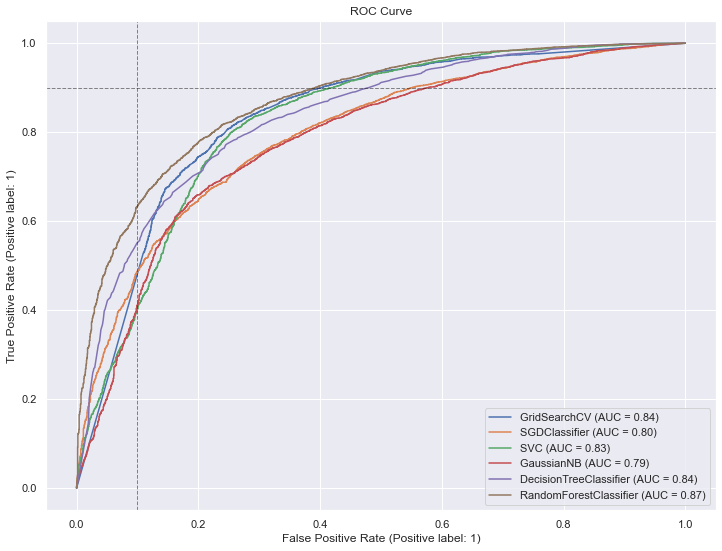

In [456]:
from sklearn.metrics import plot_roc_curve
fig, ax = plt.subplots()
for m in all_classificators:
    m.fit(X_train,y_train)
    plot_roc_curve(m, X_test, y_test, ax=ax)
    
ax.axhline(0.9, c='k', ls="--", lw=1, alpha=0.5)
ax.axvline(0.1, c='k', ls="--", lw=1, alpha=0.5)
ax.set_title("ROC Curve");


Из анализа графика ROC AUC видим, что лучше всего подходит для решаемой задачи алгоритм RandomForestClassifier. Необходимо продолжить исследования и попытаться подобрать лучшие параметры для обучения модели и получения лучшей классификации.